In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# print all columns
pd.set_option('display.max_columns', None)

In [73]:
# import data
df = pd.read_csv("abalone.csv", names = ['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings'])
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [74]:
df.shape

(4177, 9)

# EDA

In [75]:
# drop duplicates, if any
df.drop_duplicates(inplace=True)
df.shape

(4177, 9)

In [76]:
# summary stats
df.describe(include = 'all')

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


- Height has value = 0 which should not be possible. This is probably an error or a missed measurement. We will drop those records. 

In [77]:
df = df[df.height != 0]
df.shape

(4175, 9)

In [78]:
# check na
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

<AxesSubplot:>

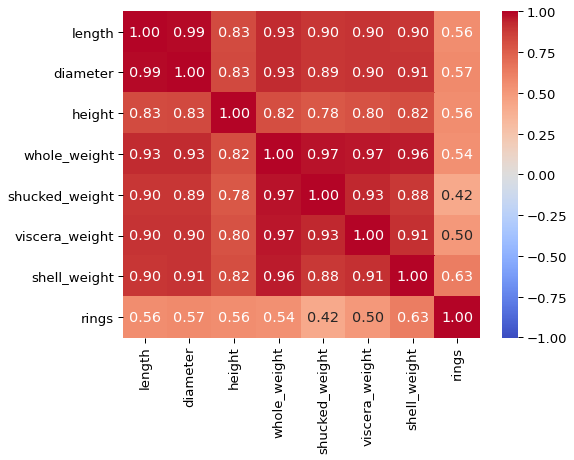

In [79]:
# check for multicollinearity
# correlation plot
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

df_corr = df.corr()

sns.heatmap(df_corr, annot=True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt='.2f')

- Almost all of the features have some correlation with each other, which is understandable given that the data is for a living species whose features are all directly correlated with each other.
- We will now drop variables that are correlated.

In [80]:
# finding correlations
## extract variable pairs having |correlation| > 0.9
corr_var = []
for c in df_corr.columns:
    for r in df_corr.index:
        if ((df_corr.loc[c, r] >= 0.9) | (df_corr.loc[c, r] <= -0.9)) & (c != r):
            corr_var.append(list([c, r]))
            
## sort and remove duplicate pairs
for i in range(len(corr_var)):
    corr_var[i].sort()
    
temp = []
for e in corr_var:
    if e not in temp:
        temp.append(e)

corr_var = temp
del(temp) # removing unnecessary variable

## extracting data for dataframe
corr_var_1, corr_var_2, corr_val = [], [], []
for e in corr_var:
    corr_var_1.append(e[0])
    corr_var_2.append(e[1])
    corr_val.append(round(df_corr.loc[e[0], e[1]], 2))

## Cumulative correlation
rcum_1, rcum_2 = [], []
for e in corr_var_1:
    rcum_1.append(round((df_corr[e].sum() - 1), 2))
    
for e in corr_var_2:
    rcum_2.append(round((df_corr[e].sum() - 1), 2))

# creating dataframe
correlations = pd.DataFrame({'r': corr_val, 'Var_1': corr_var_1, 'rcum_Var_1':rcum_1, 'Var_2':corr_var_2, 'rcum_Var_2':rcum_2})
correlations['Var_to_Remove'] = np.where((correlations['rcum_Var_1']) > (correlations['rcum_Var_2']), 
                                         correlations['Var_1'], correlations['Var_2'])
correlations


,r,Var_1,rcum_Var_1,Var_2,rcum_Var_2,Var_to_Remove
0,0.99,diameter,6.02,length,6.00,diameter
1,0.93,length,6.00,whole_weight,6.10,whole_weight
2,0.90,length,6.00,viscera_weight,5.91,length
3,0.93,diameter,6.02,whole_weight,6.10,whole_weight
4,0.91,diameter,6.02,shell_weight,6.00,diameter
5,0.97,shucked_weight,5.77,whole_weight,6.10,whole_weight
6,0.97,viscera_weight,5.91,whole_weight,6.10,whole_weight
7,0.96,shell_weight,6.00,whole_weight,6.10,whole_weight
8,0.93,shucked_weight,5.77,viscera_weight,5.91,viscera_weight
9,0.91,shell_weight,6.00,viscera_weight,5.91,shell_weight


In [81]:
# variables to drop
correlations.Var_to_Remove.unique()

array(['diameter', 'whole_weight', 'length', 'viscera_weight',
       'shell_weight'], dtype=object)

In [82]:
# dropping correlated variables
df.drop(list(correlations.Var_to_Remove.unique()), axis = 1, inplace=True)
df.head()

,sex,height,shucked_weight,rings
0,M,0.095,0.2245,15
1,M,0.090,0.0995,7
2,F,0.135,0.2565,9
3,M,0.125,0.2155,10
4,I,0.080,0.0895,7


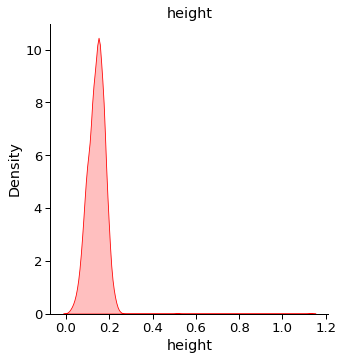

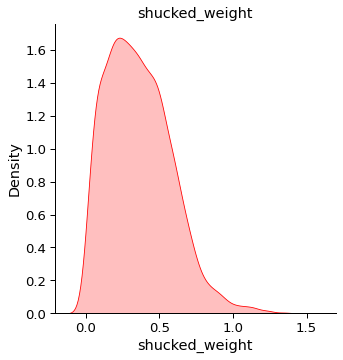

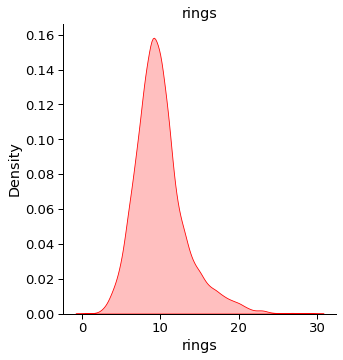

In [83]:
# checking dsitributions
for e in df.columns[1:]:
    sns.displot(df[e], kind = 'kde', color='red', fill = True)
    plt.title(e)

Let's check `height` since it has a very narrow distribution

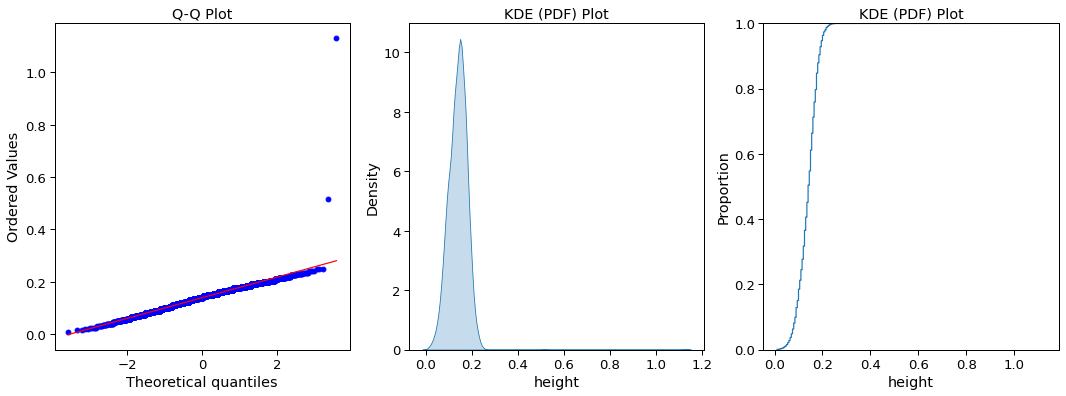

In [84]:
# function to check normality
# pdf, cdf and qq plot
def prob_plots(x):
    from scipy.stats import probplot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))

    res = probplot(x, plot = ax[0])
    ax[0].set_title("Q-Q Plot")

    ax[1] = sns.kdeplot(x, fill = True, ax = ax[1])
    ax[1].set_title("KDE (PDF) Plot")

    ax[2] = sns.ecdfplot(x, ax = ax[2])
    ax[2].set_title("KDE (PDF) Plot")

# checking height
prob_plots(df['height'])

`height` has two outliers which, if fixed, can make the distribution normal

In [85]:
# fixing outliers for height
# function to get outliers and fix them
def outlier_fix(x):
    import numpy as np
    import pandas as pd
    
    # we will use values > 1.5(IQR) as outliers and equate them to the 90th/10th percentile values 
    
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    iqr_upper_bound = 1.5*iqr + np.percentile(x, 75)
    iqr_lower_bound = np.percentile(x, 25) - 1.5*iqr
    upper_replacement = np.percentile(x, 90)
    lower_replacement = np.percentile(x, 10)
    print("IQR =", iqr)
    print("Upper, Lower Bound for Outliers =", iqr_upper_bound, ",", iqr_lower_bound)
    print("Values to replace outliers with =", upper_replacement, ",", lower_replacement)
    print("Number of Outliers =", len(x[(x > iqr_upper_bound) | (x < iqr_lower_bound)]))
    
    return iqr, iqr_upper_bound, iqr_lower_bound, upper_replacement, lower_replacement

outlier_fix(df['height'])

IQR = 0.05
Upper, Lower Bound for Outliers = 0.24000000000000002 , 0.039999999999999994
Values to replace outliers with = 0.185 , 0.09
Number of Outliers = 27


(0.05, 0.24000000000000002, 0.039999999999999994, 0.185, 0.09)

In [86]:
# we will equate outliers to upper limit (0.9 IQR)
df.loc[(df['height'] > 0.25), 'height'] = 0.24

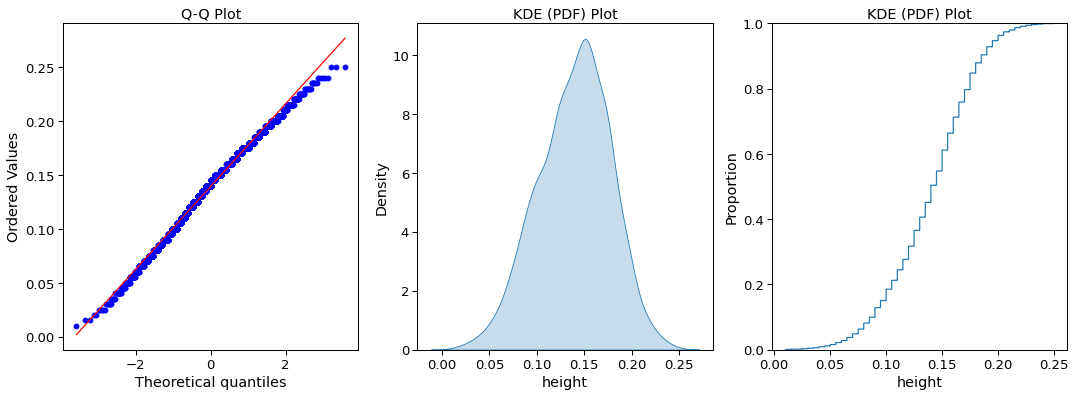

In [87]:
prob_plots(df['height'])

## Outliers in Remaining Features

In [89]:
# fixing outliers for height
# function to check for outliers
def outlier_fix(x):
    import numpy as np
    import pandas as pd
    
    # we will use values > 1.5(IQR) as outliers and equate them to the 90th/10th percentile values 
    
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    iqr_upper_bound = 1.5*iqr + np.percentile(x, 75)
    iqr_lower_bound = np.percentile(x, 25) - 1.5*iqr
    upper_replacement = np.percentile(x, 90)
    lower_replacement = np.percentile(x, 10)
    print("IQR =", format(iqr, '.3'))
    print("Upper, Lower Bound for Outliers =", format(iqr_upper_bound, '.3'), ",", format(iqr_lower_bound, '.3'))
    print("Values to replace outliers with =", format(upper_replacement, '.3'), ",", format(lower_replacement, '.3'))
#     print("Ratio of Outliers =", format(len(x[(x > iqr_upper_bound) | (x < iqr_lower_bound)])/len(x), '.2f'))
    print("Number of Outliers =", len(x[(x > iqr_upper_bound) | (x < iqr_lower_bound)]))
    
    return iqr, iqr_upper_bound, iqr_lower_bound, upper_replacement, lower_replacement

for e in df.columns[1:]:
    print(e)
    outlier_fix(df[e])
    print()

height
IQR = 0.05
Upper, Lower Bound for Outliers = 0.24 , 0.04
Values to replace outliers with = 0.185 , 0.09
Number of Outliers = 25

shucked_weight
IQR = 0.316
Upper, Lower Bound for Outliers = 0.976 , -0.287
Values to replace outliers with = 0.647 , 0.0865
Number of Outliers = 48

rings
IQR = 3.0
Upper, Lower Bound for Outliers = 15.5 , 3.5
Values to replace outliers with = 14.0 , 6.0
Number of Outliers = 278



Too many values still outside the `1.5xIQR` range so we will leave them as is.

<AxesSubplot:xlabel='sex', ylabel='count'>

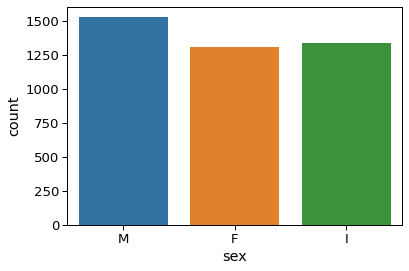

In [90]:
# check dependent variable distribution
sns.countplot(df['sex'])

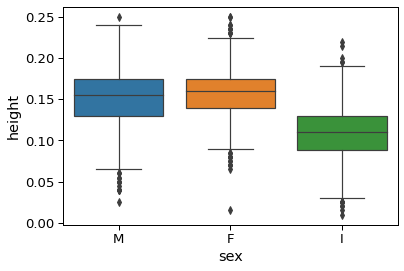

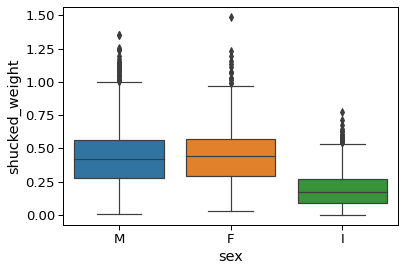

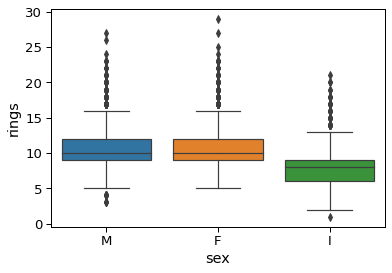

In [91]:
# compare dependent variable's categories
for e in df.columns[1:]:
    sns.boxplot(x = df['sex'], y = df[e])
    plt.show()

- All the categories are fairly equally distriburted. 
- All the parameters are low for `Infants` which is as expected.

# Model Building

In [107]:
# encoding dependent variable
df.loc[df['sex'] == 'M', 'sex'] = 0
df.loc[df['sex'] == 'F', 'sex'] = 1
df.loc[df['sex'] == 'I', 'sex'] = 2
df['sex'] = df['sex'].astype('int')

In [108]:
# import libraries
import statsmodels.api as sm

In [109]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop('sex', axis = 1)
y = df['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# add constants to X_train, X_test
X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

print('X_train =', X_train.shape)
print('X_test =', X_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)

X_train = (3340, 4)
X_test = (835, 4)
y_train = (3340,)
y_test = (835,)


## 1. Logistic Regression

In [111]:
from statsmodels.api import MNLogit

logistic_regressor = MNLogit(y_train, X_train).fit()
logistic_regressor.summary()

Optimization terminated successfully.
         Current function value: 0.892843
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                    sex   No. Observations:                 3340
Model:                        MNLogit   Df Residuals:                     3332
Method:                           MLE   Df Model:                            6
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:                  0.1861
Time:                        19:03:48   Log-Likelihood:                -2982.1
converged:                       True   LL-Null:                       -3664.0
Covariance Type:            nonrobust   LLR p-value:                1.666e-291
==================================================================================
         sex=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4855      0.244     -6.097      0.000      -1.963      -1.008
height            11.7772      2.400      4.908      0.000       7.074      16.480
shucked_weight    -1.1807      0.332     -3.561      0.000      -1.831      -0.531
rings              0.0063      0.016      0.401      0.689      -0.025       0.037
----------------------------------------------------------------------------------
         sex=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.8062      0.264     14.392      0.000       3.288       4.325
height             0.3139      3.108      0.101      0.920      -5.778       6.406
shucked_weight    -6.4145      0.557    -11.506      0.000      -7.507      -5.322
rings             -0.2189      0.025     -8.910      0.000      -0.267      -0.171
==================================================================================
"""

In [114]:
y_pred = logistic_regressor.predict(X_train)
y_pred
# from sklearn.metrics import accuracy_score
# accuracy_score(y_train, y_pred)

,0,1,2
1273,0.228669,0.181234,0.590097
1746,0.580584,0.405686,0.013730
2518,0.405010,0.288038,0.306952
1282,0.361546,0.297394,0.341060
3696,0.444414,0.540764,0.014822
...,...,...,...
3445,0.280115,0.272437,0.447447
466,0.432425,0.521555,0.046020
3093,0.383762,0.381451,0.234786
3773,0.367228,0.347480,0.285292
